In [18]:


# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
 
#from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report


#glm
import statsmodels.api as sm

Data Preprocess


In [19]:
boston_df = pd.read_csv('Boston.csv')
#boston_df.info()
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Append column to verify if greater than 0.5

In [20]:
is_greater_than_half = []
for i in range(0 , len(boston_df)):
    if boston_df.loc[i, "crim"] >= 0.5:
        #print("greater at " ,i," : ", boston_df.loc[i, "crim"] )
        is_greater_than_half.append("1")
    else:
        is_greater_than_half.append("0")

append_column = pd.DataFrame({'greater_half': is_greater_than_half})
new_boston = boston_df.join(append_column)
new_boston.iloc[10:15,[0,-1]]

,crim,greater_half
10,0.22489,0
11,0.11747,0
12,0.09378,0
13,0.62976,1
14,0.63796,1


Split Test and Training set

In [21]:
#split target and feature
target_col = new_boston.greater_half
feature_drop_target= new_boston.drop('greater_half', axis = 1) 
feature_drop_crim = feature_drop_target.drop('crim', axis = 1) 
feature_col = feature_drop_crim

# print(feature_col.head())
# print(target_col.head())
#split train, test
feature_train,feature_test,target_train,target_test=train_test_split(feature_col,target_col,test_size=0.2)


========================================== Logistic Regression ==========================================

In [22]:
#log regression
logreg = LogisticRegression()
logreg.fit(feature_train, target_train)
y_pred = logreg.predict(feature_test) 

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, target_test)))

/home/mavericku/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.89

========================================== LDA ==========================================

In [23]:
lda = LDA()
lda.fit(feature_train, target_train)
output = lda.predict(feature_test)
#print('Accuracy of LDA on test set: {:.2f}'.format(lda.score(feature_test, target_test)))

Accuracy of LDA on test set: 0.93


========================================== KNN ==========================================


In [24]:

ks = [1,3,5,7,9,11,13,15]
train_errs = []
test_errs = []

for k in ks:
    start = time.time()
    knn = KNN(n_neighbors=k).fit(feature_train, target_train)
    train_err = 1 - knn.score(feature_train, target_train)
    train_errs.append(train_err)
    test_err = 1 - knn.score(feature_test, target_test)
    test_errs.append(test_err)
    end = time.time()
    #print('k = %d, training accuracy = %f, testing accuracy = %f, runtime = %f'%(k, (1-train_err), (1-test_err), end-start))
     
    

k = 1, training accuracy = 1.000000, testing accuracy = 0.911765, runtime = 0.055321 <br>
k = 3, training accuracy = 0.972772, testing accuracy = 0.872549, runtime = 0.026159<br>
k = 5, training accuracy = 0.960396, testing accuracy = 0.862745, runtime = 0.023613<br>
k = 7, training accuracy = 0.955446, testing accuracy = 0.872549, runtime = 0.020938<br>
k = 9, training accuracy = 0.940594, testing accuracy = 0.852941, runtime = 0.021631<br>
k = 11, training accuracy = 0.925743, testing accuracy = 0.872549, runtime = 0.021542<br>
k = 13, training accuracy = 0.915842, testing accuracy = 0.843137, runtime = 0.021641<br>
k = 15, training accuracy = 0.913366, testing accuracy = 0.852941, runtime = 0.021738<br>

In [25]:
train_error_mean = ( 1 -  sum(train_errs)/len(train_errs))
# print("training error : " , train_error_mean)
teat_error_mean = ( 1 -  sum(test_errs)/len(test_errs))
# print("testing error : " ,teat_error_mean)


training error :  0.948019801980198 <br>
testing error :  0.8676470588235294


In [26]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, target_test)))
print('Accuracy of LDA on test set: {:.2f}'.format(lda.score(feature_test, target_test)))
print("KNN training error : " , train_error_mean)
print("KNN testing error : " ,teat_error_mean)

Accuracy of logistic regression classifier on test set: 0.87
Accuracy of LDA on test set: 0.91
KNN training error :  0.9514232673267327
KNN testing error :  0.8799019607843137


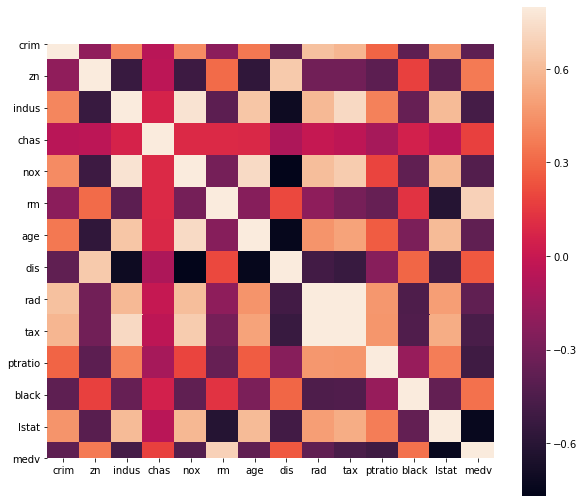

In [37]:
# Attempt different predictors 

corrmat = new_boston.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);
plt.savefig('hw3_heatmap.png')

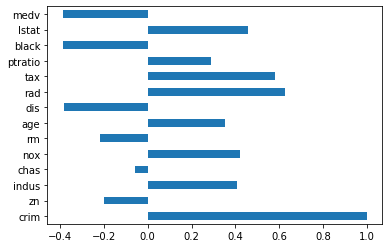

In [38]:
rating_corr = new_boston[new_boston.columns[:]].corr()['crim']
rating_corr.plot(kind = "barh")
plt.savefig('hw3_q1_coeff.png')

In [36]:

feature_col = feature_drop_crim.drop("chas",axis = 1)
feature_col = feature_col.drop("zn", axis = 1)
feature_col = feature_col.drop("rm", axis = 1)

feature_train,feature_test,target_train,target_test=train_test_split(feature_col,target_col,test_size=0.2)
#log regression
logreg = LogisticRegression()
logreg.fit(feature_train, target_train)
y_pred = logreg.predict(feature_test) 

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, target_test)))

lda = LDA()
lda.fit(feature_train, target_train)
output = lda.predict(feature_test)
print('Accuracy of LDA on test set: {:.2f}'.format(lda.score(feature_test, target_test)))

ks = [1,3,5,7,9,11,13,15]
train_errs = []
test_errs = []

for k in ks:
    start = time.time()
    knn = KNN(n_neighbors=k).fit(feature_train, target_train)
    train_err = 1 - knn.score(feature_train, target_train)
    train_errs.append(train_err)
    test_err = 1 - knn.score(feature_test, target_test)
    test_errs.append(test_err)
    end = time.time()
    #print('k = %d, training accuracy = %f, testing accuracy = %f, runtime = %f'%(k, (1-train_err), (1-test_err), end-start))
     
train_error_mean = ( 1 -  sum(train_errs)/len(train_errs))
# print("training error : " , train_error_mean)
teat_error_mean = ( 1 -  sum(test_errs)/len(test_errs))
print("testing error : " ,teat_error_mean)


/home/mavericku/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.92
Accuracy of LDA on test set: 0.96
testing error :  0.9375
